# EDA and Data Visualization 

In [21]:
# Import required libraries 
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style('whitegrid')
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
import scipy.stats as stats
from scipy.stats import norm, skew
from scipy.special import boxcox1p

In [22]:
# Loading data
df = pd.read_csv('../data/fatal_encounters_eda.csv')

In [23]:
df1 = df.drop(df[df.Race > 1].index)

In [24]:
df1.shape

(12127, 11)

In [25]:
df1['Race'].value_counts()

0    7143
1    4984
Name: Race, dtype: int64

In [26]:
df1.shape

(12127, 11)

In [27]:
# Looking at data's shape
df.shape

(15833, 11)

In [28]:
# Looking at the head of the data
df.head(3)

,Name,Age,Gender,Race,Date of injury resulting in death (month/day/year),State,Cause of death,Brief description,Intended use of force (Developing),"Location of Death (City,County)",Intended use of force
0,John Edward Pittman,45,1.0,1,2000-01-05,AL,Gunshot,John Edward Pittman was shot and killed by off...,Deadly force,"Dothan, Houston",0.0
1,John Frank Brown,20,1.0,1,2000-01-05,GA,Beaten/Bludgeoned with instrument,"On Jan. 5 around midnight, 20-year-old John Fr...",Less-than-lethal force,"Atlanta, Fulton",1.0
2,Kyle Dillon,19,1.0,0,2000-01-06,NE,Gunshot,Kyle Dillon allegedly walked up to officer Jas...,Deadly force,"York, York",0.0


In [29]:
# Looking at the tail of the data
df.tail(3)

,Name,Age,Gender,Race,Date of injury resulting in death (month/day/year),State,Cause of death,Brief description,Intended use of force (Developing),"Location of Death (City,County)",Intended use of force
15830,Leonard Francis Kieren,60,1.0,0,2020-12-04,AZ,Gunshot,Leonard Francis Kieren was wanted on an open c...,Deadly force,"Buckeye, Maricopa",0.0
15831,Kwamaine O'Neal,47,1.0,1,2020-12-05,OH,Gunshot,Officers called to Kwamaine O'Neal's residence...,Deadly force,"Toledo, Lucas",0.0
15832,Mark Brewer,28,1.0,1,2020-12-06,MO,Gunshot,"Around 6 a.m., an officer with the SLMPD had b...",Deadly force,"St. Louis, St. Louis City",0.0


In [30]:
# Description 
df.nunique(axis=0)
df.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,Gender,Race,Intended use of force
count,15833.000000,15833.000000,15796.000000
mean,0.941199,0.822270,0.157255
std,0.235260,0.878476,0.455516
min,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000
75%,1.000000,1.000000,0.000000
max,1.000000,3.000000,2.000000


In [31]:
# Closer look at different values in Cause of death column 
df['Cause of death'].value_counts()

Gunshot                              13993
Tasered                                735
Medical emergency                      289
Asphyxiated/Restrained                 208
Drug overdose                          153
Beaten/Bludgeoned with instrument      140
Drowned                                111
Undetermined                            69
Other                                   48
Fell from a height                      33
Chemical agent/Pepper spray             21
Stabbed                                 17
Burned/Smoke inhalation                 16
Name: Cause of death, dtype: int64

In [32]:
# Putting the outliers in Cause of death column under one catagory 
df['Cause of death'] = df['Cause of death'].apply(lambda x: 'Other' if x in ('Undetermined', 'Other', 'Fell from a height', 'Chemical agent/Pepper spray',
                                                                                   'Stabbed','Burned/Smoke inhalation') else x)


In [33]:
# Checking the values again 
df['Cause of death'].value_counts()

Gunshot                              13993
Tasered                                735
Medical emergency                      289
Asphyxiated/Restrained                 208
Other                                  204
Drug overdose                          153
Beaten/Bludgeoned with instrument      140
Drowned                                111
Name: Cause of death, dtype: int64

In [ ]:
plt.figure(figsize=(9,7))
sns.countplot(np.log(df.), bins=20)
plt.ylabel("Frequency", size=15)
plt.title('log(Sale Price Distribution)', size=20);
plt.xlabel("log(Sale Price")
plt.hist(np.log(train.saleprice), bins=20)

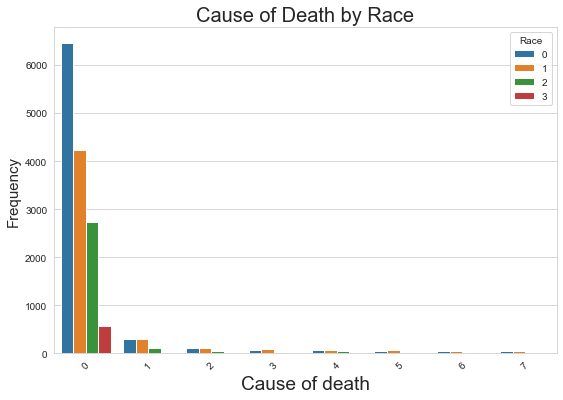

In [50]:
# Looking at the number of fatal encounters by race and male/female. 
_, ax = plt.subplots(figsize=(9, 6))
sns.countplot(data = df, x = 'Cause of death', hue = 'Race');
plt.xlabel("Cause of death", size=19)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.ylabel("Frequency", size=15)
plt.title('Cause of Death by Race', size=20);

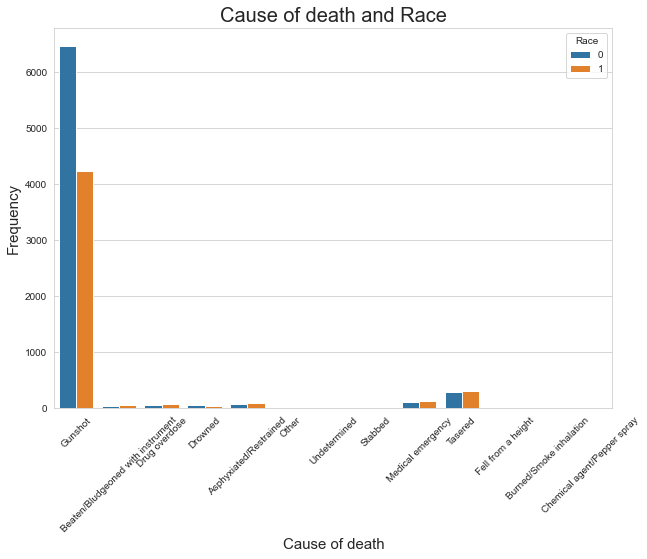

In [35]:
# Looking at the number of fatal encounters by race and male/female. 
_, ax = plt.subplots(figsize=(10, 7))
sns.countplot(data = df1, x = 'Cause of death', hue = 'Race');
plt.xlabel("Cause of death", size=15)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.ylabel("Frequency", size=15)
plt.title('Cause of death and Race', size=20);

In [36]:
# Remapping the values in the column 
df['Cause of death'] = df['Cause of death'].map({'Gunshot': 0, 'Tasered': 1, 'Medical emergency':2, 'Asphyxiated/Restrained':3, 'Other':4,
                            'Drug overdose':5, 'Beaten/Bludgeoned with instrument':6, 'Drowned':7})

In [37]:
# Data description 
df.nunique(axis=0)
df.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,Gender,Race,Cause of death,Intended use of force
count,15833.000000,15833.000000,15833.000000,15796.000000
mean,0.941199,0.822270,0.324323,0.157255
std,0.235260,0.878476,1.114515,0.455516
min,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,0.000000
max,1.000000,3.000000,7.000000,2.000000


In [38]:
# Looking at Location of Death value counts
df['Location of Death (City,County)'].value_counts()

Los Angeles, Los Angeles         318
Houston, Harris                  302
Chicago, Cook                    270
Phoenix, Maricopa                186
Las Vegas, Clark                 169
                                ... 
Bennettsville, Marlboro            1
Derry, Rockingham                  1
Little, Seminole                   1
Morgantown, Burke                  1
Truth or Consequences, Sierra      1
Name: Location of Death (City,County), Length: 5021, dtype: int64

In [39]:
# Looking at State value counts 
df['State'].value_counts()

CA    2800
TX    1690
FL    1196
AZ     569
IL     491
GA     469
OH     463
WA     424
NY     403
OK     393
PA     387
CO     354
MO     353
TN     345
NC     326
LA     321
NV     303
VA     278
NJ     275
MI     273
IN     269
AL     258
SC     244
MD     230
OR     212
WI     211
NM     210
MN     201
KY     182
AR     167
MS     163
UT     158
KS     140
MA     108
IA     107
WV      95
NE      92
ID      87
CT      86
HI      72
AK      63
MT      59
ME      57
DC      48
SD      39
NH      34
DE      33
WY      28
VT      23
ND      22
RI      22
Name: State, dtype: int64

In [40]:
# Checking the columns
df.columns

Index(['Name', 'Age', 'Gender', 'Race',
       'Date of injury resulting in death (month/day/year)', 'State',
       'Cause of death', 'Brief description',
       'Intended use of force (Developing)', 'Location of Death (City,County)',
       'Intended use of force'],
      dtype='object')

In [41]:
# Checking data types 
df.dtypes

Name                                                   object
Age                                                    object
Gender                                                float64
Race                                                    int64
Date of injury resulting in death (month/day/year)     object
State                                                  object
Cause of death                                          int64
Brief description                                      object
Intended use of force (Developing)                     object
Location of Death (City,County)                        object
Intended use of force                                 float64
dtype: object

In [42]:
# Replacing the string in Age from '40-50' with '45'
df = df.replace(['40-50'],'45')

In [43]:
# changing Age to float 
df['Age'] = df['Age'].astype(float) 

In [46]:
df['Age'].mean()

35.10894397776796

In [47]:
df['Age'].mode()

0    25.0
dtype: float64

In [48]:
df['Age'].median()

33.0

In [44]:
# rechecking data types 
df.dtypes

Name                                                   object
Age                                                   float64
Gender                                                float64
Race                                                    int64
Date of injury resulting in death (month/day/year)     object
State                                                  object
Cause of death                                          int64
Brief description                                      object
Intended use of force (Developing)                     object
Location of Death (City,County)                        object
Intended use of force                                 float64
dtype: object

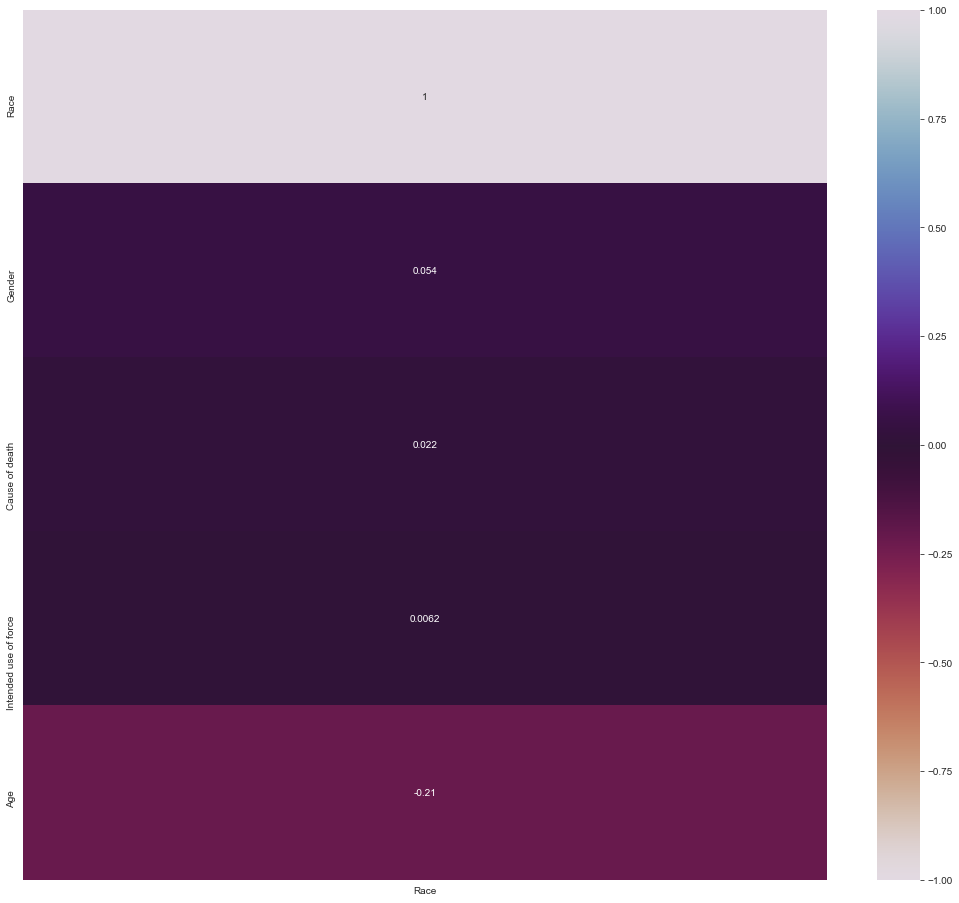

In [45]:
# Looking at heat map to visualize corralation to race
plt.figure(figsize=(18,16 ))
sns.heatmap(df.corr()[['Race']].sort_values(by='Race', ascending=False), annot=True, vmin=-1, vmax=1, cmap='twilight_r');

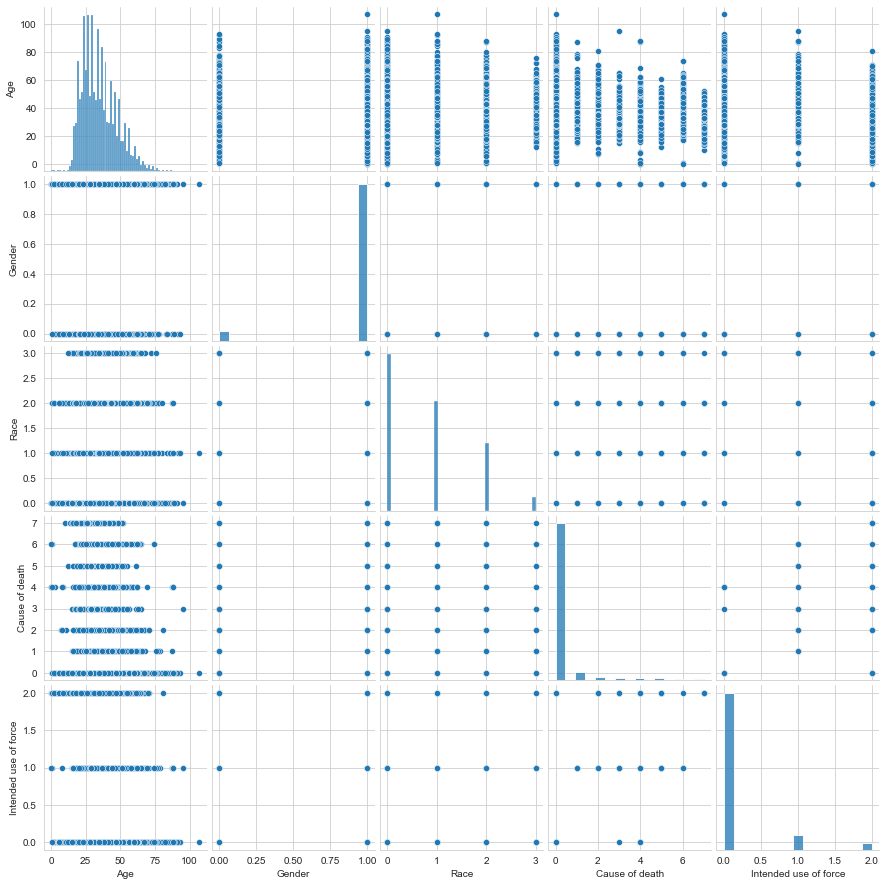

In [30]:
# Looking at the pairplot to further visualize corralations
sns.pairplot(df)

<AxesSubplot:>

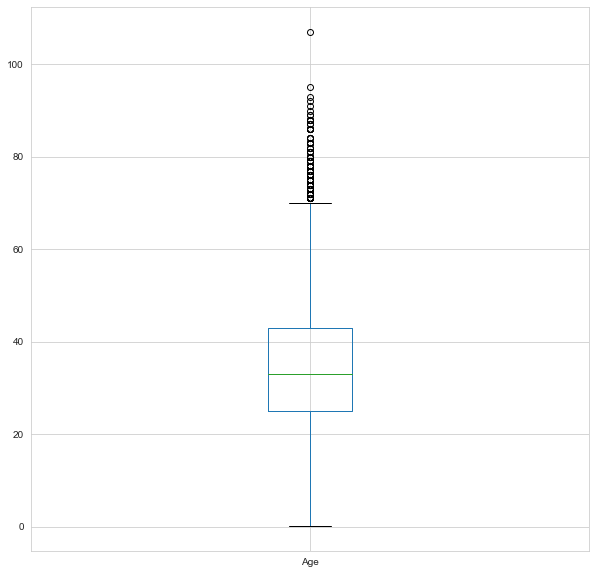

In [31]:
# Boxplot for Age
plt.figure(figsize=(10,10))
df.boxplot('Age')

The boxplot shows a normal distribution where the median age is around 30 years old. The upper quartile is a little over 40 years old and lower quertile is around 25 years old. There are quite a few outliers ove 70 years. 

C:\Users\domin_lxdhy\anaconda3\envs\dsi\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


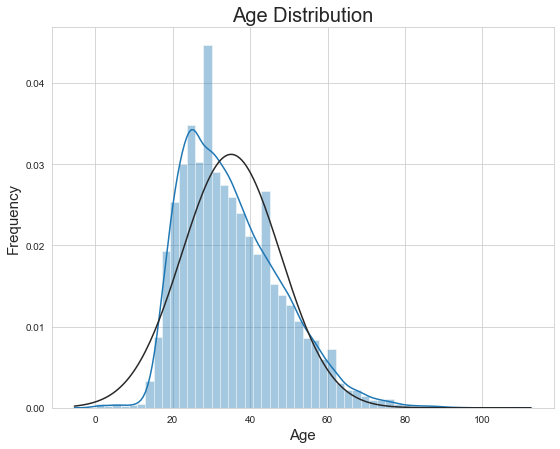

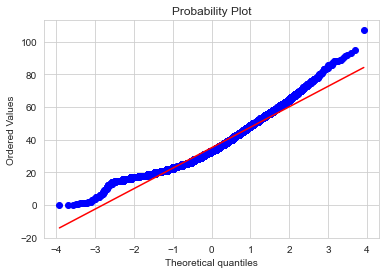

In [32]:
# Age displot along with probablity plot
plt.figure(figsize=(9,7))
sns.distplot(df.Age, fit=norm);
plt.ylabel("Frequency", size=15)
plt.title('Age Distribution', size=20);
plt.xlabel("Age", size=15)

# Get fitted parameters
(mu, sigma) = norm.fit(df['Age']);
fig = plt.figure()
res = stats.probplot(df['Age'], plot=plt)
plt.show()

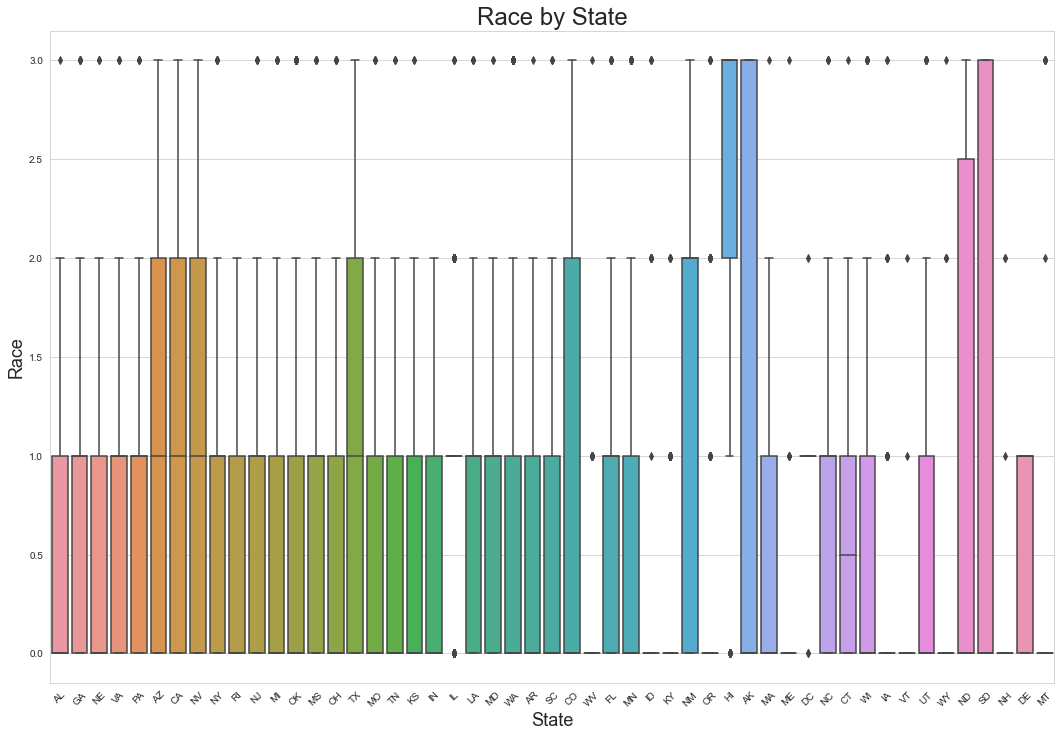

In [33]:
_, ax = plt.subplots(figsize=(18, 12))
sns.boxplot(x='State', y='Race', data=df, ax=ax)
ax.set_title("Race by State", fontsize=24)
ax.set_xlabel("State", fontsize=18)
plt.xticks(rotation=45)
ax.set_ylabel("Race", fontsize=18);

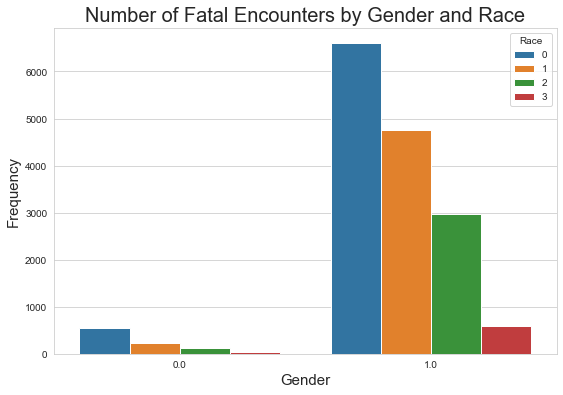

In [51]:
# Looking at the number of fatal encounters by race and male/female. 
plt.figure(figsize=(9,6))
sns.countplot(data = df, x = 'Gender', hue = 'Race');
plt.xlabel("Gender", size=15)
plt.ylabel("Frequency", size=15)
plt.title('Number of Fatal Encounters by Gender and Race', size=20);

In [52]:
#Removing females from gender 
df = df.drop(df[df.Gender == 0.0].index)

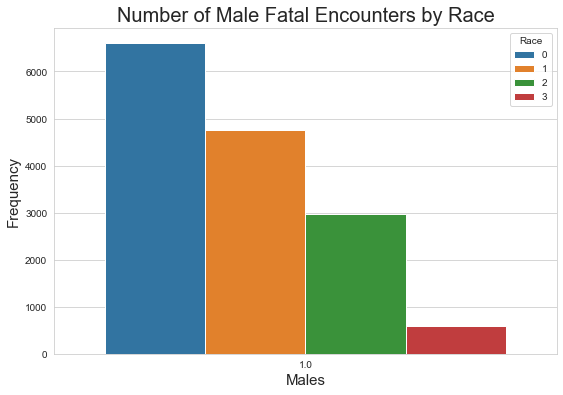

In [53]:
# Looking closer at the number of fatal encounters by race including only males. 
plt.figure(figsize=(9,6))
sns.countplot(data = df, x = 'Gender', hue = 'Race');
plt.xlabel("Males", size=15)
plt.ylabel("Frequency", size=15)
plt.title('Number of Male Fatal Encounters by Race', size=20);

First countplot clearly shows us that females do not have a significant presence. By removing female gender from the dataset we can have a closer look at the male fatal enounters by race. The frequency does does make sense going along the population and race. The number of persons in the dataset by race is also shown in the 2 below graphs. 

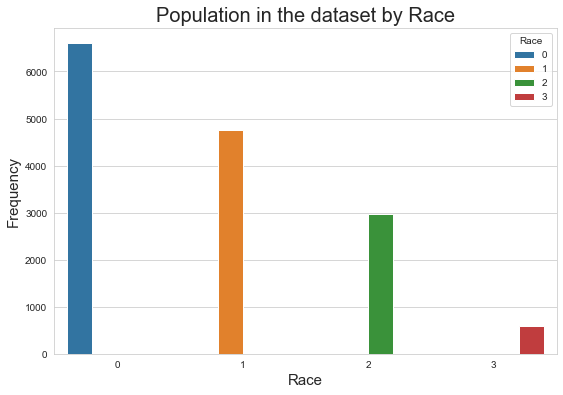

In [61]:
plt.figure(figsize=(9,6))
sns.countplot(data = df, x = 'Race', hue = 'Race');
plt.xlabel("Race", size=15)
plt.ylabel("Frequency", size=15)
plt.title('Population in the dataset by Race', size=20);

C:\Users\domin_lxdhy\anaconda3\envs\dsi\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Race')

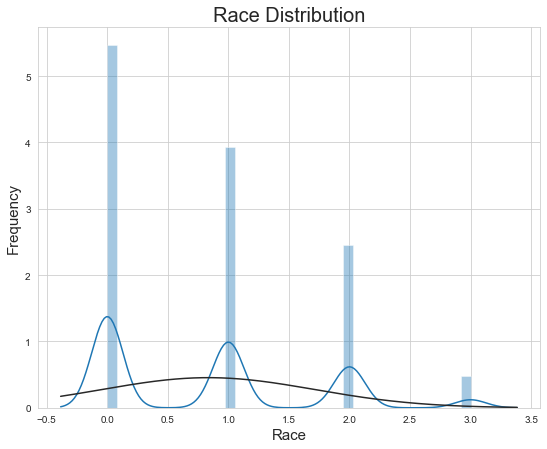

In [55]:
# Race distribution displot 

plt.figure(figsize=(9,7))
sns.distplot(df.Race, fit=norm);
plt.ylabel("Frequency", size=15)
plt.title('Race Distribution', size=20);
plt.xlabel("Race", size=15)
